<a href="https://colab.research.google.com/github/vinit13792/My_projects/blob/master/ULMFIT_baseline_for_Twitter_US_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


#### Upload the file so we could process it



# Import the required packages

In [0]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling, selection, and evaluation
from fastai.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels 


## Reading the file in dataframe

In [0]:
# Read file into dataframe
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv('Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1270,569859213331189760,negative,1.0000,Late Flight,0.6799,United,NaN,scottychadwick,NaN,0,@united day 3 of this Saga maybe they'll finally make it home.Intentional or not it not gonna get them back there vacation days #badservice,NaN,2015-02-23 05:59:58 -0800,NaN,Eastern Time (US & Canada)
5192,569264328186179584,negative,1.0000,Cancelled Flight,0.6715,Southwest,NaN,amy_ginsburg,NaN,0,@SouthwestAir reservation (FEHQNE) 21FEB15 | DCA-RSW. Want refund not credit for Cancelled Flightled flight please.,NaN,2015-02-21 14:36:06 -0800,"North Bethesda, MD",Atlantic Time (Canada)
8134,568752061682208768,positive,1.0000,NaN,NaN,Delta,NaN,TyrellJourdanA,NaN,0,@JetBlue Really!? That's good to hear! Thanks for the update @walls29 We may make that business meeting after all.,NaN,2015-02-20 04:40:33 -0800,The Eastside of the Far Side,Eastern Time (US & Canada)
11505,568063386321158145,positive,0.6445,NaN,NaN,US Airways,NaN,RoryPhilbin1,NaN,0,@USAirways thanks so much!,NaN,2015-02-18 07:04:00 -0800,NYC/London,NaN
10772,568890203923980288,neutral,0.6600,NaN,0.0000,US Airways,NaN,CraigHall19701,NaN,0,@USAirways Used 2 get emails 1) pre-purchase a snack and 2) when time to check in. Got neither 4 tomorrow's trip. Do they not get sent now?,NaN,2015-02-20 13:49:28 -0800,Delaware,Eastern Time (US & Canada)


### Deleting the columns which are not important

In [0]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']

### Mood analysis

In [0]:
Mood_count=df['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Mood Analysis')

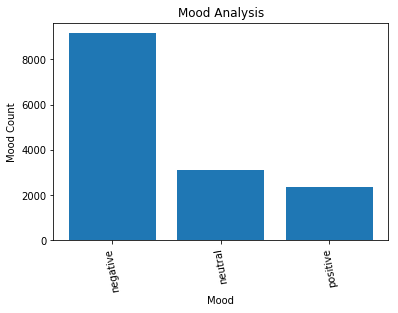

In [0]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'], rotation = 100)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Mood Analysis')

### Counting the number of Tweets for each airline

In [0]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64

### Mood analysis for each Airline to see the distribution of Tweets.

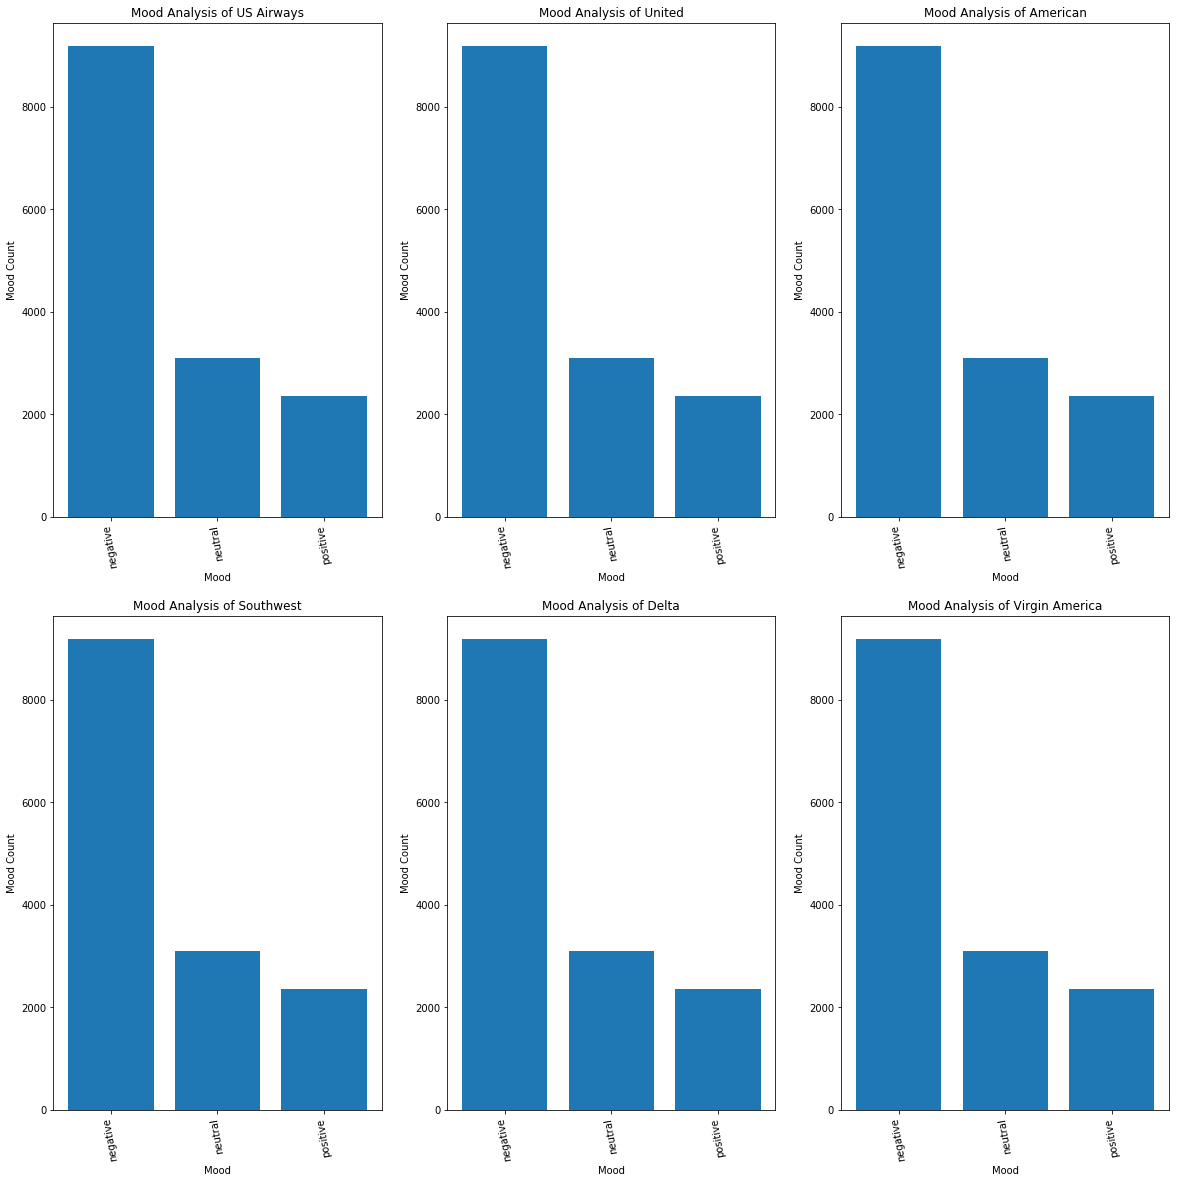

In [0]:
def plot_sub_sentiment(Airline):
    df_plot=df[df['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'], rotation = 100)
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Mood Analysis of '+Airline)
plt.figure(1,figsize=(20, 20))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of moods for the first three airlines are always skewed toward negative moods. On contrary, the moods are distributed more balanced with the later three airline companies.

### Lets try to find some unique reasons for such Tweets on each airline

In [0]:
NR_Count=dict(df['negativereason'].value_counts(sort=False))

In [0]:
def NR_Count(Airline):
    if Airline=='All':
        df_nr=df
    else:
        df_nr=df[df['airline']==Airline]
    count=dict(df_nr['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [0]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Reason Analysis '+Airline)

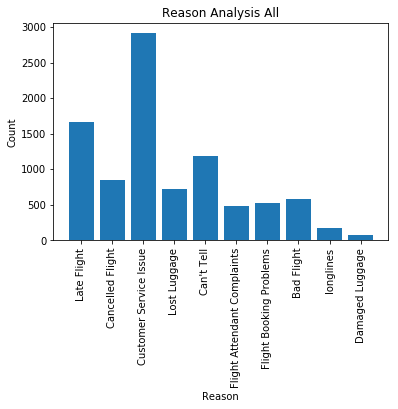

In [0]:
plot_reason('All')

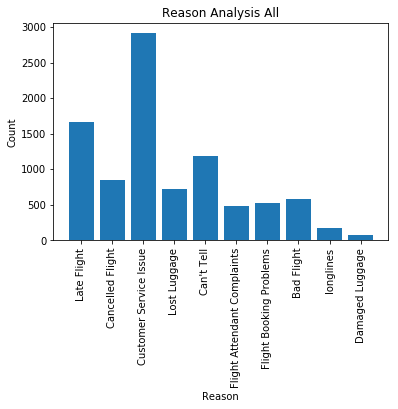

In [0]:
plot_reason('All')

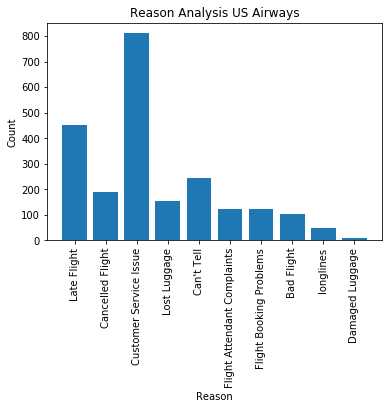

In [0]:
plot_reason('US Airways')

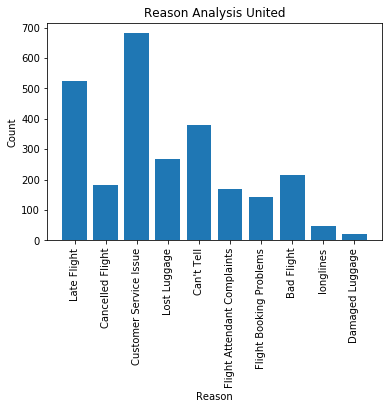

In [0]:
plot_reason('United')

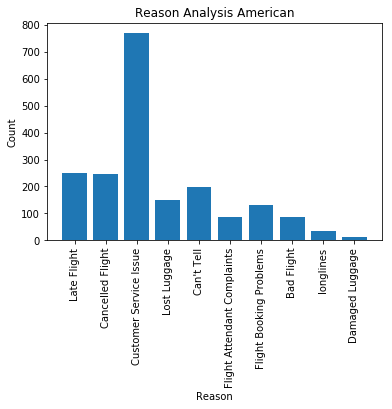

In [0]:
plot_reason('American')

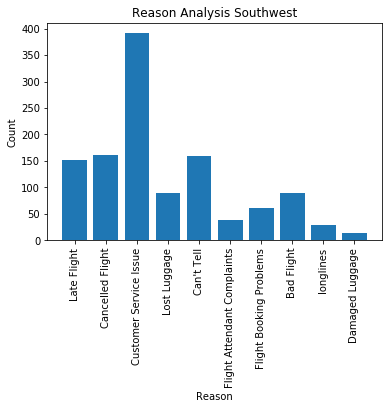

In [0]:
plot_reason('Southwest')

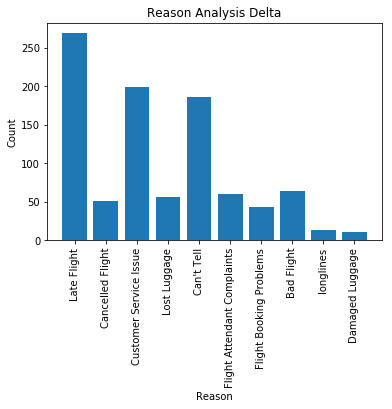

In [0]:
plot_reason('Delta')

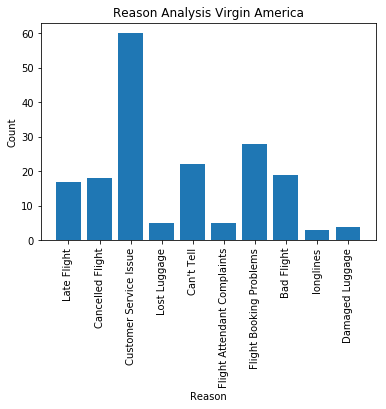

In [0]:
plot_reason('Virgin America')

#### Let split the data into train and test 

In [0]:
test_percentage = 0.1
df.sort_index(inplace=True)
cutoff = int(test_percentage * df.shape[0])
df[['airline_sentiment', 'text']][:cutoff].to_csv('Tweets_filtered_test.csv', index=False, encoding='utf-8')
df[['airline_sentiment', 'text']][cutoff:].to_csv('Tweets_filtered_train.csv', index=False, encoding='utf-8')
df[['text']][cutoff:].to_csv('Tweets_text_only_train.csv', index=False, encoding='utf-8')

This does all the necessary preprocessing behind the scene

In [0]:
data = TextClasDataBunch.from_csv('.', 'Tweets_filtered_train.csv')
data.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @united i xxup just xxup asked xxup my xxup boyfriend xxup to xxup prom xxup over xxup the xxup xxunk xxup on xxup flight 494 xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever ! ! ! xxup thank u xxup so xxup much xxrep 6 !,positive
"xxbos @united xxmaj waiting for 3494 xxup ewr - xxup ord , delayed 47 mins . xxmaj might miss xxunk xxup ord - xxup ywg at 6 pm xxup ct . xxmaj any room on xxunk xxup ord - xxup ywg in case i miss xxunk ?",negative
xxbos @jetblue xxmaj flight 136 departs xxunk xxup am xxmaj finally ! ! ! xxmaj arrived xxup jfk with no xxunk at xxunk xxup pm . xxmaj that 's a long flight . xxup aka xxup bus http : / / t.co / xxunk,negative
"xxbos @united ( 2 / 2 ) xxmaj it xxunk that if ca n't confirm cert at time of xxmaj flight xxmaj booking xxmaj problems , i should assume that it may never clear . xxmaj did n't used to be that way",negative


####The rules are all listed below, here is the meaning of the special tokens:

1. UNK (xxunk) is for an unknown word (one that isn't present in the current vocabulary)
2. PAD (xxpad) is the token used for padding, if we need to regroup several texts of different lengths in a batch
3. BOS (xxbos) represents the beginning of a text in your dataset
4. FLD (xxfld) is used if you set mark_fields=True in your TokenizeProcessor to separate the different fields of texts (if your texts are loaded from several columns in a dataframe)
5. TK_MAJ (xxmaj) is used to indicate the next word begins with a capital in the original text
6. TK_UP (xxup) is used to indicate the next word is written in all caps in the original text
7. TK_REP (xxrep) is used to indicate the next character is repeated n times in the original text (usage xxrep n {char})
8. TK_WREP(xxwrep) is used to indicate the next word is repeated n times in the original text (usage xxwrep n {word})

Tokenization splits the raw texts into tokens (which can be words, or punctuation signs...). The most basic way to do this would be to separate according to spaces, but it's possible to be more subtle; for instance, the contractions like "isn't" or "don't" should be split in ["is","n't"] or ["do","n't"]. By default fastai will use the powerful spacy tokenizer.

Numericalization is easier as it just consists in attributing a unique id to each token and mapping each of those tokens to their respective ids.

In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

Lets check if tokenization has done its work or not.

In [0]:
print(data.train_ds[0][0])
print(data.train_ds[1][0])
print(data.train_ds[2][0])

xxbos @southwestair - just got it back about 20 mins ago . xxmaj went about 18 hrs w / o it but i appreciate the support . $ 50 voucher + $ 50 for xxunk .
xxbos @americanair xxmaj still on hold . xxmaj way to suck .
xxbos @americanair xxmaj reservation xxmaj line wo n't let me speak to a representative because they are too busy . xxmaj they literally disconnect you . xxmaj why bother ?


It has!!

In [0]:
print(data.train_ds[0][0].data[:10])
print(data.train_ds[1][0].data[:10])
print(data.train_ds[2][0].data[:10])

[  2  29  46  62 112  32 101 108 375 304]
[  2  26   5  97  21  83   9   5 135  10]
[  2  26   5 263   5 244 234  34 203  35]


### Language Model

In [0]:
bs = 24
seed = 333

In [0]:
data_lm = (TextList.from_csv('.', 'Tweets_text_only_train.csv')
            .random_split_by_pct(0.1, seed = seed)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
# data_lm = load_data(path, 'data_lm.pkl', bs=bs)
data_lm.show_batch()

idx,text
0,xxmaj xxunk ( xxmaj australia ) to xxmaj bogota ( xxmaj xxunk ) tomorrow xxbos @united xxmaj hi . xxmaj my relative 's xxmaj flight xxmaj booking xxmaj problems number is xxup xxunk . xxmaj her name is xxmaj xxunk xxmaj xxunk xxmaj xxunk . xxmaj thank you xxbos @united it was delivered ! xxmaj thank you for making sure it arrived at my xxunk ! xxbos @united - rebooked
1,"good to know . xxbos @united okay . xxmaj thanks . xxbos @united xxmaj conference xxunk in 3 hours . xxmaj up all night due to delays and still waiting to talk to someone about lost luggage . xxbos @united xxmaj seat xxup xxunk , xxmaj flight xxup xxunk xxbos @united is it on a flight now ? xxmaj thanks for reply . xxbos @united is xxunk and i am"
2,"and the delay turns into a xxmaj cancelled xxmaj flight ... xxbos @united xxup ua xxunk delayed again - i get charged $ 600 if xxmaj late xxmaj flight by you - you say "" oh well "" xxbos @united we are trying to go as far away from king'scollegelondon as possible for # charity today . xxmaj would you help us ? # jailbreak # xxup rag xxbos @united"
3,"1st class . xxmaj xxunk ? xxmaj really ? @united : xxunk xxmaj your xxunk is xxunk xxbos @united xxmaj thanks xxmaj yup i 'm all set . xxmaj it happens . xxup slc ground staff were prompt , helpful and courteous . xxbos xxmaj there were plenty of empty seats in coach "" @united : xxmaj your xxunk is understood . xxmaj crew members traveling for duty are pre"
4,"when i boarded . xxbos “ @united : xxunk xxmaj sorry to hear about your flight . xxmaj do you need help reflight xxmaj booking xxmaj problems ? ” \n \n 👎 xxbos @united now we are trying to get to xxmaj san xxmaj juan from xxmaj chicago o'hare . xxmaj having lots of problems . xxmaj may get a standby flight . xxbos @united xxmaj alright , thank"


We can use the data_lm object we created earlier to fine-tune a pretrained language model. fast.ai has an English model with an AWD-LSTM architecture available that we can download. We can create a learner object that will directly create a model, download the pretrained weights and be ready for fine-tuning.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


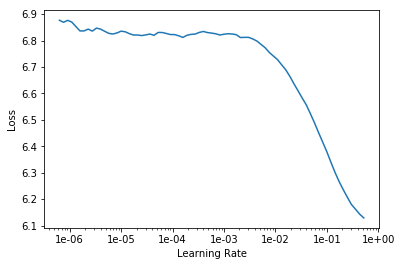

In [0]:
learn.recorder.plot(skip_end=15)

Pick a learning rate which suits best. The rapidly falling one

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.288232,3.916812,0.256310,00:19


Save the model

In [0]:
learn.save('fit_head')
# learn.load('fit_head')

Unfreeze the weights, like a computer vision model, we can then unfreeze the model and fine-tune it.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.903989,3.796043,0.271905,00:24
1,3.767188,3.684642,0.285238,00:25
2,3.619108,3.601649,0.295893,00:25
3,3.425485,3.554490,0.301042,00:25
4,3.226623,3.546616,0.304226,00:25
5,3.028291,3.570776,0.304316,00:25
6,2.852166,3.591273,0.302946,00:25
7,2.698339,3.619177,0.302202,00:25
8,2.604774,3.642096,0.300863,00:25
9,2.565279,3.648721,0.301161,00:25


In [0]:
learn.save('fine_tuned')

In [0]:
learn.save_encoder('fine_tuned_enc')

## Classifier Model

In [0]:
data_clas = (TextList.from_csv('.', 'Tweets_filtered_train.csv', cols = 'text')               
             .random_split_by_pct(0.1, seed = seed)
             .label_from_df(cols=0)
             .databunch(bs=bs))
data_clas.save('data_clas.pkl')
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @usairways xxmaj my xxmaj flight xxmaj booking xxmaj problems xxup xxunk just times out when i select it under xxmaj manage xxmaj my xxmaj flight xxmaj booking xxmaj problems for months now . i have emailed but no response . xxmaj help ?,negative
xxbos @united xxmaj missed xxup xxunk flight due to ur xxmaj cancelled xxmaj flightlation . xxmaj xxunk supervisor disgusting . xxmaj now day xxmaj late xxmaj flight . xxmaj no apology or upgrade offer to xxup lhr from xxup ord ? ? ?,negative
xxbos @usairways i 've been on hold for over 2 1 / 2 hours - there has to be an easier way to xxmaj cancelled xxmaj flight / get a refund ... 😑 😩 http : / / t.co / xxunk,negative
"xxbos @southwestair xxmaj hi ! xxmaj winter xxmaj xxunk xxmaj advisory issued for xxup stl . xxmaj snow & & xxmaj ice & & xxmaj cold , oh my ! xxmaj will you issue a travel advisory for that ?",neutral


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

#### Learning Rate Finder

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


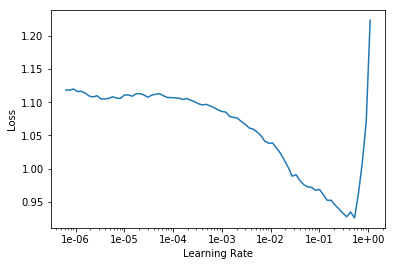

In [0]:
learn.recorder.plot()

Choose the rate from which it starts dropping rapidly

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.613108,0.515314,0.798026,00:16


In [0]:
learn.save('first')
# learn.load('first)

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.597906,0.489920,0.806378,00:18


In [0]:
learn.save('second')
# learn.load('second')

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.575581,0.500939,0.807137,00:27


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.502627,0.466952,0.813212,00:35
1,0.519303,0.453159,0.820046,00:35
2,0.499411,0.451652,0.818527,00:35


So after repeating the freezing weights and unfreezing weights, we are getting a 82% accuracy. Lets evaluate this against our test set.


### Evaluating the test set

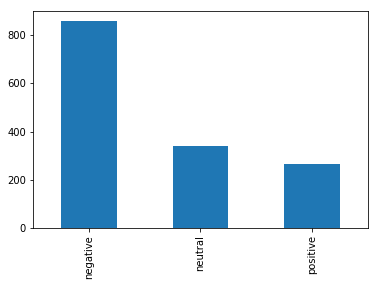

In [0]:
test_df = pd.read_csv("Tweets_filtered_test.csv", encoding="utf-8")
test_df['airline_sentiment'].value_counts().plot(kind='bar')

In [0]:
test_df['pred_sentiment'] = test_df['text'].apply(lambda row: str(learn.predict(row)[0]))
print("Test Accuracy: ", accuracy_score(test_df['airline_sentiment'], test_df['pred_sentiment']))

Test Accuracy:  0.7889344262295082


After training the entire model for six epochs, the classifier achieves an accuracy of around 83%. 

How good is this result compared to possible benchmarks?

For this purpose, we can consider a probabilistic as well as a random approach. Since  dataset is imbalanced with around 60% of the tweets labeled negative, assigning a tweet to this label is most likely. This method would result in an accuracy of 60%. If we just randomly drew labels for each tweet, every third tweet would be guessed right on average. Hence, the classifier model clearly outperforms both these benchmarks.

Comparing our results to other approaches on the same datasets Kaggle, the ULMFiT model is clearly superior in terms of accuracy:

Support Vector Machine (SVM) - 78.5%

Bag-of-words SVM - 78.5%

Deep Learning Model with Dropouts in Keras - 77.9%

My result - 78.8%

How well can knowledge be transferred from a source domain that is quite different to the target domain?
The results of this project indicate that ULMFiT indeed provides state-of-the-art results even with a dataset as small as our Twitter US Airline Sentiment.